*Task1* author:md zahid hasan

First i install all necessary libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Loading and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
#  Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [14]:
#  Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Train the model
num_epochs = 50
history = model.fit(train_images, train_labels, epochs=num_epochs, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3699 - accuracy: 0.8903 - val_loss: 0.1444 - val_accuracy: 0.9576
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1782 - accuracy: 0.9469 - val_loss: 0.1095 - val_accuracy: 0.9675
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1384 - accuracy: 0.9575 - val_loss: 0.1018 - val_accuracy: 0.9695
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1149 - accuracy: 0.9651 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0998 - accuracy: 0.9689 - val_loss: 0.0894 - val_accuracy: 0.9717
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.9718 - val_loss: 0.0835 - val_accuracy: 0.9755
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0814 - accuracy: 0.9743 - val_loss: 0.0838 - val_accuracy:

In [16]:
#  Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9807
Test accuracy: 0.9807000160217285
Test loss: 0.10805559158325195


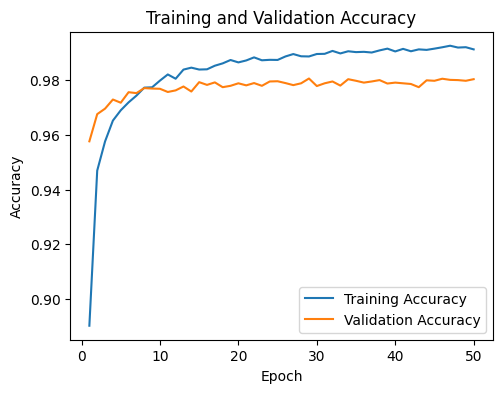

In [17]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

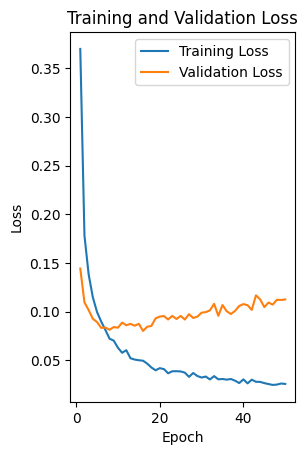

In [18]:
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [19]:
#  Additional performance metrics
predicted_labels = model.predict(test_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

313/313 [==============================] - 1s 2ms/step


In [20]:
# Confusion matrix
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_classes)

# Precision, Recall, F1-Score
precision = tf.keras.metrics.Precision()(test_labels, predicted_classes)
recall = tf.keras.metrics.Recall()(test_labels, predicted_classes)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision.numpy()}")
print(f"Recall: {recall.numpy()}")
print(f"F1-Score: {f1_score.numpy()}")

Precision: 0.9988914728164673
Recall: 0.99900221824646
F1-Score: 0.9989468455314636


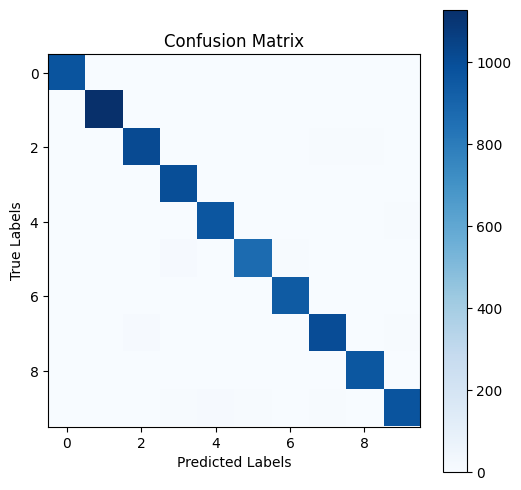

In [21]:
# Display confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
